<a href="https://colab.research.google.com/github/ddavila9789/Personal-Portfolio-Monte-Carlo-Simulation/blob/main/Personal_Portfolio_Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install pandas-datareader

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 6.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfin
from re import L
from numpy.ma.core import shape
from matplotlib import style
from pandas_datareader import data as pdr

In [ ]:
#getting data

#needed to bypass yahoo 
yfin.pdr_override()

#function to collect the mean returns and covalance matrix
def get_data(stocks, start, end):
  stockData = pdr.get_data_yahoo(stocks, start, end)
  stockData = stockData['Close']
  returns = stockData.pct_change()
  meanReturns = returns.mean()
  covMatrix = returns.cov()
  return meanReturns, covMatrix


#stocks in my portfolio
stockList = ['TSLA','AAPL','MSFT','AMD','NVDA','BABA']
stocks = [stock for stock in stockList]

endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days=365)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

#weights for portfolio
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

[*********************100%***********************]  6 of 6 completed


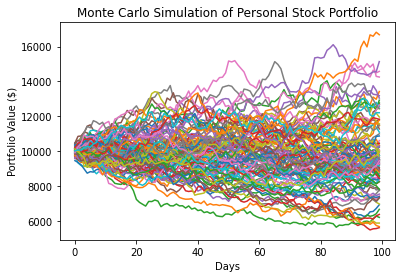

In [ ]:
#Monte Carlo Method

#number of simulations
mc_sims = 100
T = 100 #timeframe in days

#empty arrays to fill with mean returns data based on number of days
meanM = np.full(shape=(T, len(weights)), fill_value= meanReturns)
meanM = meanM.T

#other array for portfolio returns data
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

#Cholesky Decomposition (used to determine Lower Triangular Matrix)
# Z are the samples from a normal distribution
for m in range(0, mc_sims):
  #mc loops
  Z = np.random.normal(size=(T, len(weights)))
  L = np.linalg.cholesky(covMatrix)
  #Assuming daily returns are distributed by a Multivariate Normal Distribution 
  dailyReturns = meanM + np.inner(L, Z)
  portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio


#MCS graph
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of Personal Stock Portfolio')
plt.show()